In [16]:
import pandas as pd
import numpy as np
import psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import inspect
import seaborn as sns
import matplotlib.pyplot as plt

# Establishing postgres connection

In [18]:
# Define your database connection details.
dbname = "dap_project"
user = "postgres"
password = "postgres"
host = "localhost"


# Connect to the database.
conn = psycopg2.connect(database=dbname,
                        user=user,
                        password=password,
                        host=host)

print("connection successfull")

connection successfull


# Getting the data back from the postgres sql to make visualizations

In [20]:
try:
    query = 'SELECT * FROM baton_rouge_crime_2'
    df_from_db = pd.read_sql(query, conn)
    
    print("Data loaded from PostgreSQL to DataFrame successfully!")
except Exception as e:
    print("Error loading data from PostgreSQL to DataFrame:", e)

# engine = establish_postgres_connection(postgresUsername, postgresPassword, postgresHost, postgresPort, postgresDbname)
# disease_df_cleaned = extract_disease_data_from_postgresql(engine, table_name)

/var/folders/pp/93wc99kj26b3hg5_2y8sxlpm0000gn/T/ipykernel_22825/3531528581.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_from_db = pd.read_sql(query, conn)


Data loaded from PostgreSQL to DataFrame successfully!


In [21]:
df_from_db.head()

,attempted_or_committed,street_address,subzone,description,categoty,crime_against,offense_code,offense,neighborhood
0,COMMITTED,2414 DESOTO DR,4B3,UNAUTHORIZED USE OF A MOTOR VEHICLE,THEFT,PROPERTY,240,MOTOR VEHICLE THEFT,BAKER
1,COMMITTED,7801 SCENIC HWY,4C1,BATTERY OF A DATING PARTNER,BATTERY,PERSON,13B,SIMPLE ASSAULT,SCOTLANDVILLE
2,COMMITTED,4527 PERKINS RD,2B2,THEFT OF A MOTOR VEHICLE.,THEFT,PROPERTY,240,MOTOR VEHICLE THEFT,POLLARD / WOODCHASE
3,COMMITTED,1000 N 31ST ST,1B1,AGGRAVATED BATTERY,BATTERY,PERSON,13A,AGGRAVATED ASSAULT,FAIRFIELDS
4,COMMITTED,4570 EVANGELINE ST,4G2,SIMPLE CRIMINAL DAMAGE TO PROPERTY,CRIMINAL DAMAGE TO PROPERTY,PROPERTY,290,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,DELMONT PLACE


# Visualizations

In [23]:
# Bar Chart

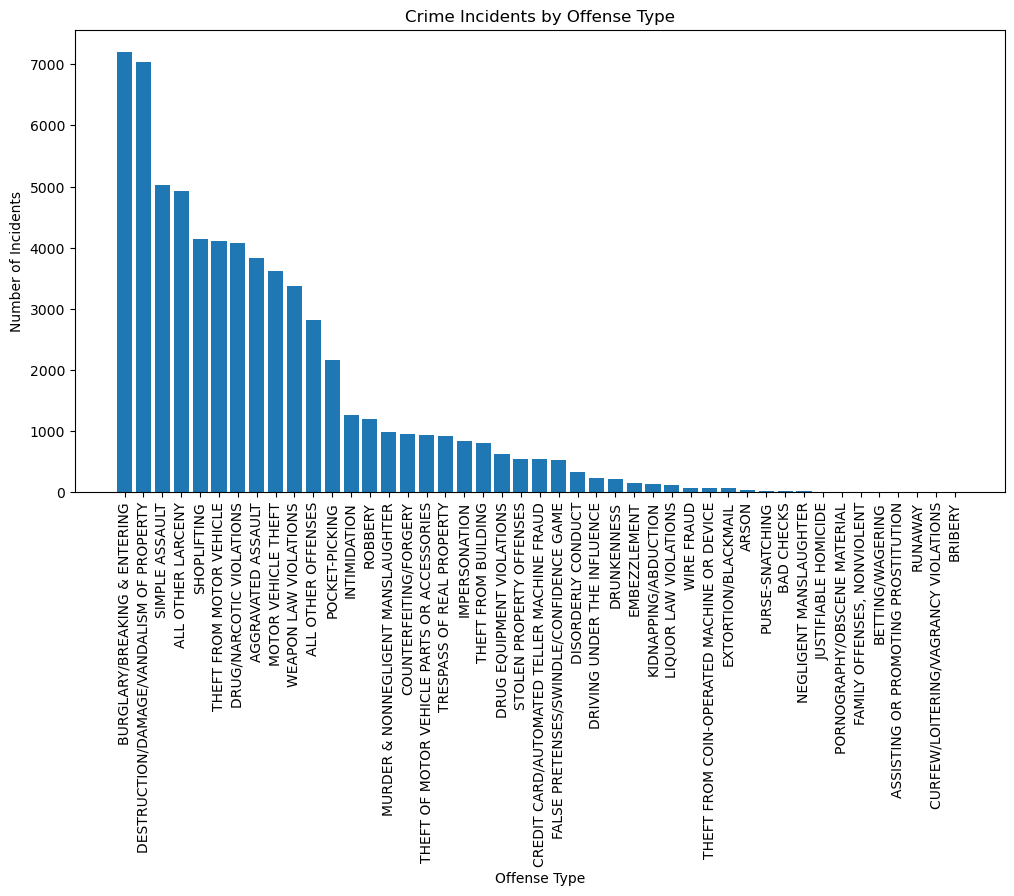

In [24]:
offense_counts = df_from_db['offense'].value_counts()
plt.subplots(figsize=(12, 6))
plt.bar(offense_counts.index, offense_counts.values)
plt.xlabel('Offense Type')
plt.ylabel('Number of Incidents')
plt.title('Crime Incidents by Offense Type')
plt.xticks(rotation=90)
plt.show()

In [25]:
# Pie Chart

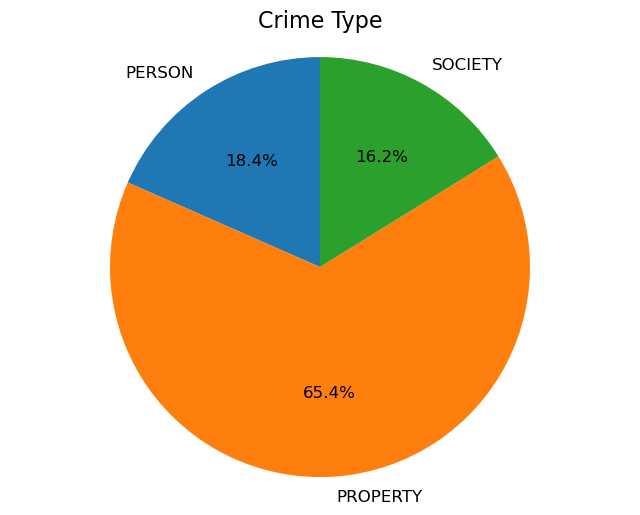

In [26]:
# Group data by offense type and calculate the total incidents
offense_count = df_from_db.groupby('crime_against').size().reset_index(name='COUNT')

# Exclude 'NOT A CRIME' and 'PERSON/NOT A CRIME' categories
offense_count = offense_count[~offense_count['crime_against'].isin(['NOT A CRIME', 'PERSON/NOT A CRIME','PERSON, PROPERTY,OR SOCIETY'])]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(offense_count['COUNT'], labels=offense_count['crime_against'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Crime Type', fontsize=16)
plt.axis('equal')
plt.show()

In [27]:
# Stacked Bar Chart

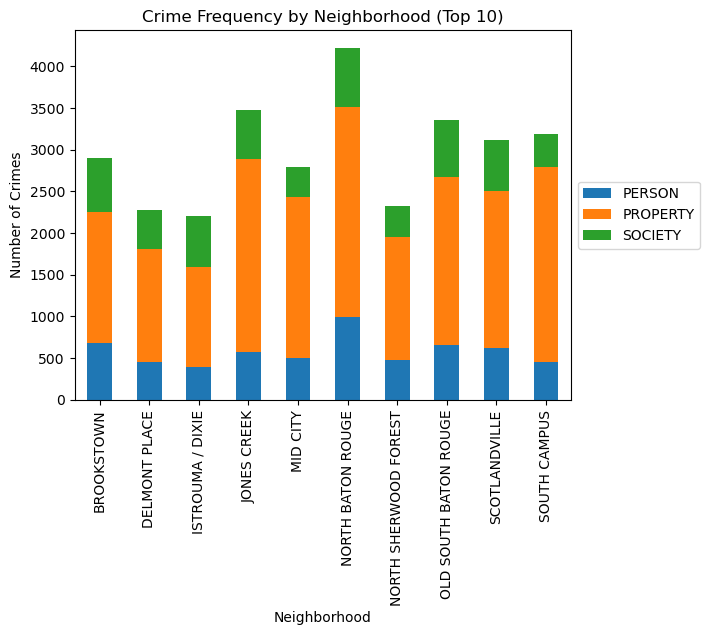

In [35]:
# Get the top 10 neighborhoods by total number of crimes
top_10_neighborhoods = df_from_db['neighborhood'].value_counts().head(10).index.tolist()

# Filter the dataframe to include only the top 10 neighborhoods
df_top_10 = df_from_db[df_from_db['neighborhood'].isin(top_10_neighborhoods)]

# Create a pivot table of the crime frequency by neighborhood and crime type
neighborhood_crime_counts = df_top_10.pivot_table(values='attempted_or_committed', index='neighborhood', columns='crime_against', aggfunc='count')

if 'NOT A CRIME' in neighborhood_crime_counts.columns:
    neighborhood_crime_counts.drop('NOT A CRIME', axis=1, inplace=True)
    
if 'PERSON, PROPERTY,OR SOCIETY' in neighborhood_crime_counts.columns:
    neighborhood_crime_counts.drop('PERSON, PROPERTY,OR SOCIETY', axis=1, inplace=True)   

if 'PERSON/NOT A CRIME' in neighborhood_crime_counts.columns:
    neighborhood_crime_counts.drop('PERSON/NOT A CRIME', axis=1, inplace=True)      

# Create a stacked bar chart of the crime frequency by neighborhood
ax = neighborhood_crime_counts.plot(kind='bar', stacked=True)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequency by Neighborhood (Top 10)')

# Move the legend outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [29]:
# Bar Chart

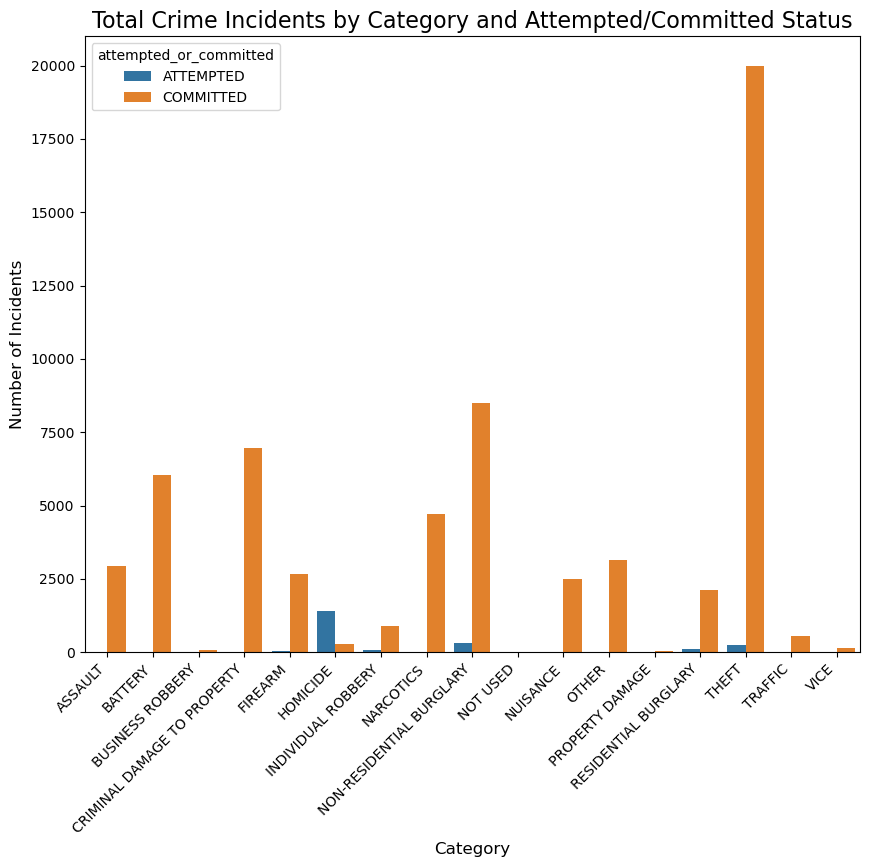

In [30]:
# Group data by category and attempted or committed status and calculate the total incidents
category_count = df_from_db.groupby(['categoty', 'attempted_or_committed']).size().reset_index(name='COUNT')

# Create a stacked bar chart of the total incidents by category and attempted or committed status
plt.figure(figsize=(10, 8))
sns.barplot(x='categoty', y='COUNT', hue='attempted_or_committed', data=category_count)
plt.title('Total Crime Incidents by Category and Attempted/Committed Status', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Expand x-axis
plt.xticks(rotation=45, ha='right')
plt.gca().set(xlim=(-0.5, len(category_count['categoty'].unique()) - 0.5))

plt.show()
